In [ ]:
import pandas as pd

# Upload CSV
df = pd.read_csv("AB_NYC_2019.csv")

# To see first rows
df.head()


df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:

df.isnull().sum()

(df.isnull().sum() / len(df)) * 100

,0
id,0.000000
name,0.032723
host_id,0.000000
host_name,0.042949
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


In [ ]:
import pandas as pd

# --- Load dataset ---
df = pd.read_csv("AB_NYC_2019.csv")

# --- Replace nulls in reviews_per_month with 0 ---
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# --- Convert last_review to datetime ---
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# errors='coerce' converts invalid or missing values to NaT (Not a Time)

# --- Quick check after cleaning ---
print(df['reviews_per_month'].isnull().sum())  # should be 0
print(df['last_review'].isnull().sum())        # still has nulls, it's fine
df.info()


0
10052
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         

In [ ]:
# --- Quick look at price statistics ---
print(df['price'].describe())

# --- Quick look at minimum_nights statistics ---
print(df['minimum_nights'].describe())

# ---Filter out extreme outliers ---
# We'll keep prices between 10 and 1000 USD
# We'll keep minimum_nights between 1 and 365
df_clean = df[(df['price'] >= 10) & (df['price'] <= 1000) &
              (df['minimum_nights'] >= 1) & (df['minimum_nights'] <= 365)]

# --- Check new shape ---
print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64
Original shape: (48895, 16)
Cleaned shape: (48631, 16)


In [ ]:
def check_id_duplicates(df):


    id_dups = df['id'][df['id'].duplicated()]
    print(f"Column 'id': {id_dups.shape[0]} duplicates")
    if id_dups.shape[0] > 0:
        print("Duplicated id values:", id_dups.unique())
    else:
        print("No duplicates in 'id'.")



In [ ]:
avg_price = df_clean.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index()
print(avg_price)

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  127.506596
1                Bronx     Private room   63.147692
2                Bronx      Shared room   59.800000
3             Brooklyn  Entire home/apt  168.529313
4             Brooklyn     Private room   72.891352
5             Brooklyn      Shared room   50.773723
6            Manhattan  Entire home/apt  224.753679
7            Manhattan     Private room  109.222250
8            Manhattan      Shared room   88.933194
9               Queens  Entire home/apt  141.970785
10              Queens     Private room   68.244214
11              Queens      Shared room   54.163265
12       Staten Island  Entire home/apt  139.925287
13       Staten Island     Private room   62.292553
14       Staten Island      Shared room   57.444444


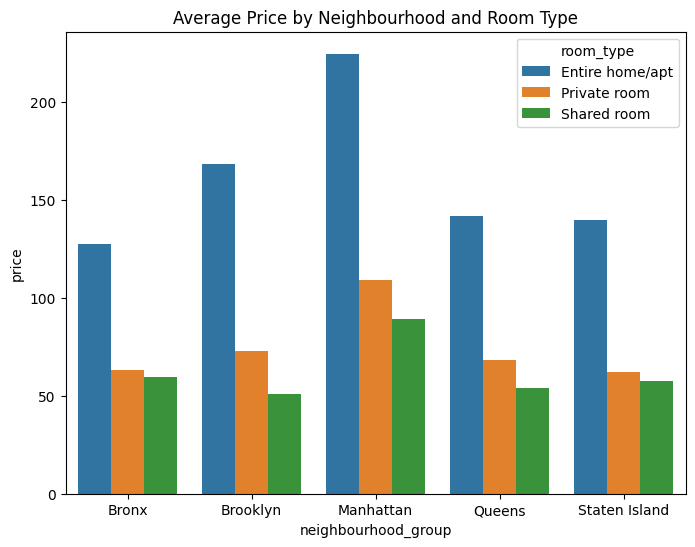

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=avg_price, ax=ax)
ax.set_title("Average Price by Neighbourhood and Room Type")

fig.savefig("average_price_by_neighbourhood.png", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
df_clean['price'].describe()

,price
count,48631.000000
mean,141.312866
std,116.737448
min,10.000000
25%,69.000000
50%,105.000000
75%,175.000000
max,1000.000000


In [ ]:
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_clean[(df_clean['price'] < Q1 - 1.5*IQR) | (df_clean['price'] > Q3 + 1.5*IQR)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 2732


In [ ]:
# Filter out price outliers using IQR
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1

# Keep only listings within the normal price range
df_no_outliers = df_clean[(df_clean['price'] >= Q1 - 1.5*IQR) & (df_clean['price'] <= Q3 + 1.5*IQR)]

# Number of listings before and after filtering
print("Original shape:", df_clean.shape)
print("Cleaned shape:", df_no_outliers.shape)

Original shape: (48631, 16)
Cleaned shape: (45899, 16)


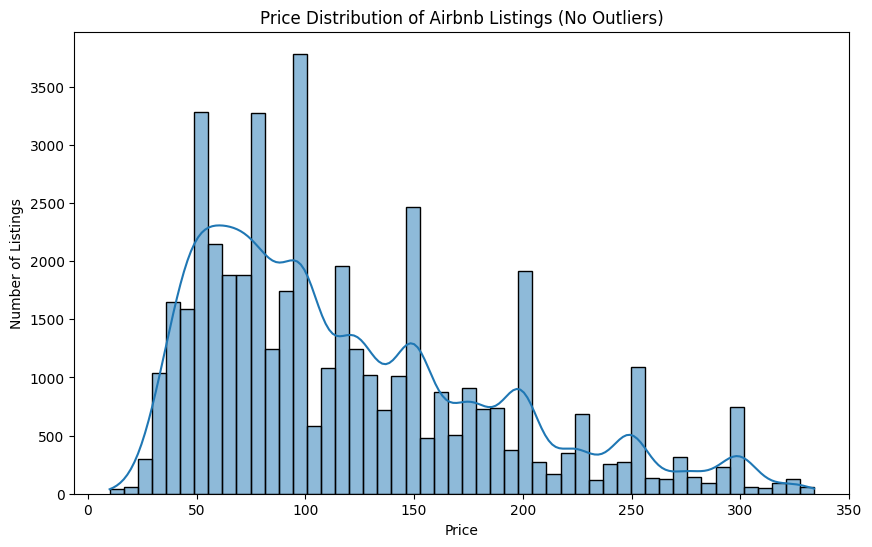

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(df_no_outliers['price'], bins=50, kde=True, ax=ax)
ax.set_title('Price Distribution of Airbnb Listings (No Outliers)')
ax.set_xlabel('Price')
ax.set_ylabel('Number of Listings')

fig.savefig("price_distribution.png", dpi=300, bbox_inches='tight')

plt.show()

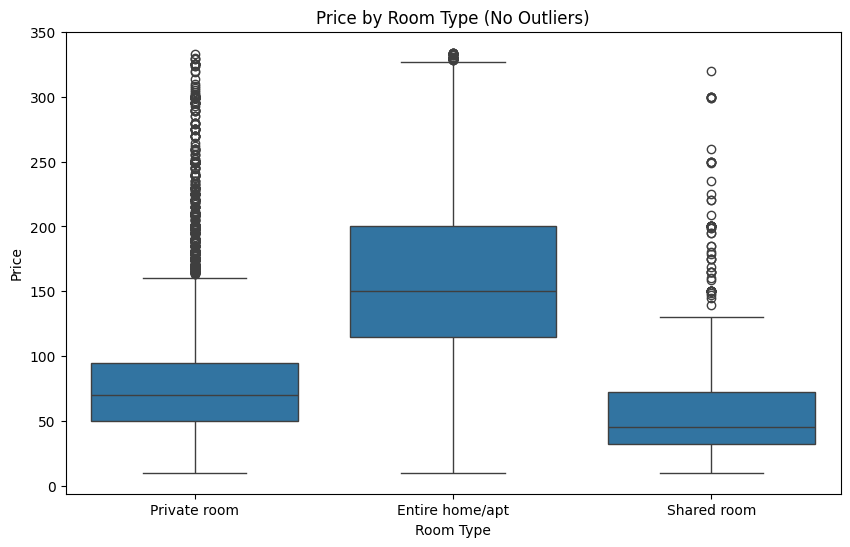

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df_no_outliers, ax=ax)
ax.set_title('Price by Room Type (No Outliers)')
ax.set_xlabel('Room Type')
ax.set_ylabel('Price')
fig.savefig("price_by_room_type.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

df_no_outliers.to_csv("/content/drive/MyDrive/df_no_outliers.csv", index=False)


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


ls: cannot access '/content/drive/MyDrive/': No such file or directory


In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Cargar el DataFrame guardado
df_no_outliers = pd.read_csv("/content/drive/MyDrive/df_no_outliers.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_no_outliers[['number_of_reviews', 'price']].corr()


,number_of_reviews,price
number_of_reviews,1.000000,-0.027607
price,-0.027607,1.000000


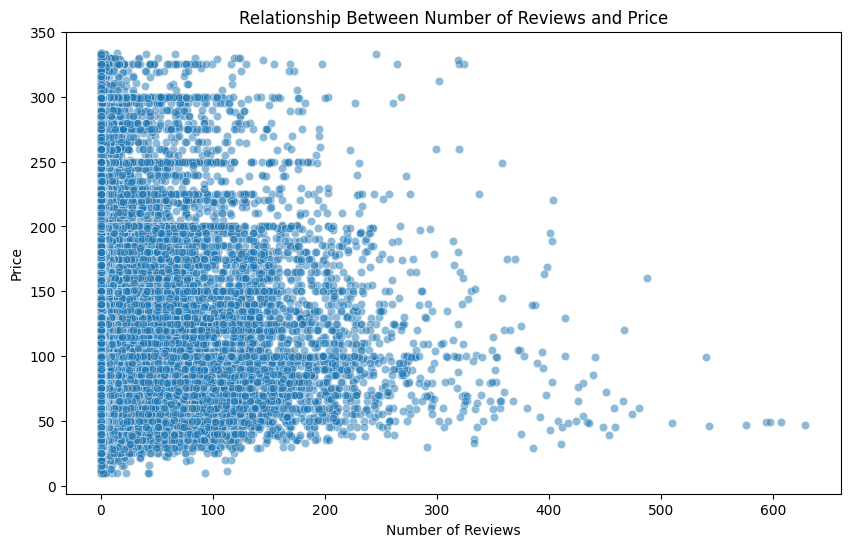

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x='number_of_reviews', y='price', data=df_no_outliers, alpha=0.5)
plt.title('Relationship Between Number of Reviews and Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')

plt.savefig("/content/drive/MyDrive/relationship_reviews_price.png", dpi=300, bbox_inches='tight')

plt.show()



In [23]:
zone_popularity = df_no_outliers.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')
zone_popularity = zone_popularity.sort_values(by='count', ascending=False)
print(zone_popularity.head(10))



   neighbourhood_group        room_type  count
6            Manhattan  Entire home/apt  11289
4             Brooklyn     Private room  10052
3             Brooklyn  Entire home/apt   8939
7            Manhattan     Private room   7747
10              Queens     Private room   3351
9               Queens  Entire home/apt   2020
1                Bronx     Private room    647
8            Manhattan      Shared room    464
5             Brooklyn      Shared room    409
0                Bronx  Entire home/apt    363


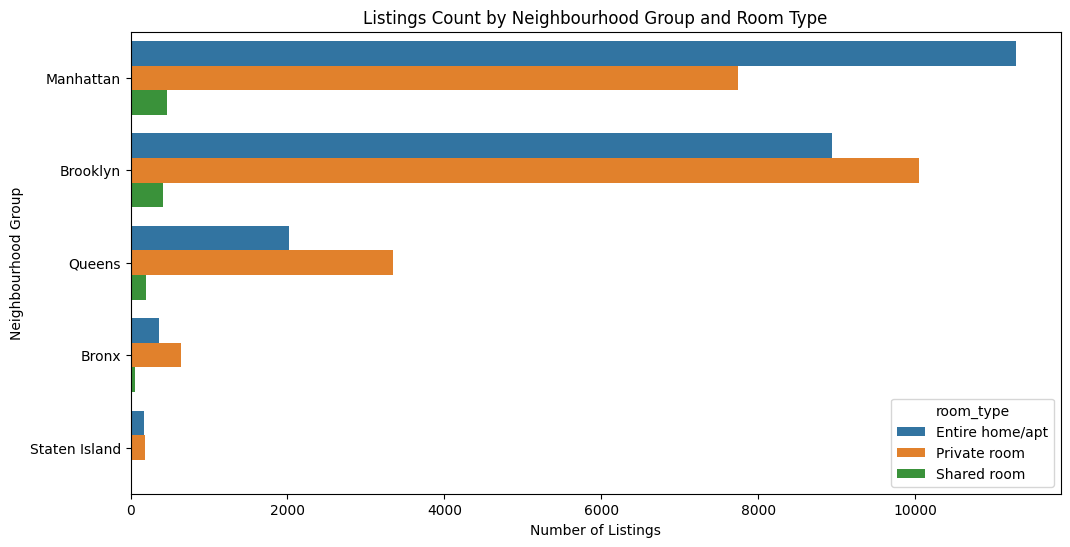

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

plt.figure(figsize=(12,6))
sns.barplot(
    x="count",
    y="neighbourhood_group",
    hue="room_type",
    data=zone_popularity
)

plt.title("Listings Count by Neighbourhood Group and Room Type")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood Group")

img_path = "/content/zone_popularity.png"
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()

files.download(img_path)

In [27]:
!pip install folium


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
              

In [33]:
import folium
from folium.plugins import HeatMap
from google.colab import files

# Create the map centered on the dataset's average coordinates
m = folium.Map(
    location=[df_no_outliers['latitude'].mean(), df_no_outliers['longitude'].mean()],
    zoom_start=11,
    tiles='cartodbpositron'
)

# Prepare data for the heatmap: [lat, lon, price]
heat_data = df_no_outliers[['latitude', 'longitude', 'price']].values.tolist()

# Add heatmap layer
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

# Add a title using HTML
title_html = '''
     <h3 align="center" style="font-size:20px">
     <b>Airbnb Listings Heatmap in New York City (Intensity by Price)</b></h3>
     '''
m.get_root().html.add_child(folium.Element(title_html))

# Save and download as HTML
m.save("heatmap_airbnb.html")
files.download("heatmap_airbnb.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
m.save("heatmap_airbnb.html")


In [34]:
from google.colab import files
files.download("heatmap_airbnb.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
m